### Step 1: Import necessary libraries

In [27]:
# CODE 1: Import numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency

### Step 2: Read Titanic Dataset

In [28]:
# CODE 2: Read titanic dataset
titanic = pd.read_csv("titanic.csv")

### Step 3: Exploratory Data Analysis

### A. Check format of the imported data

In [29]:
# CODE 3.1: Print head of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# CODE 3.2: Print tail of the dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [31]:
# CODE 4: Print info of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### B. Check basic summary statistics of the imported data

In [32]:
# CODE 5: Print basic statistics of the numeric data (note: PassengerID, Survived, and Pclass variables are considered categorical even if they are numbers)
titanic.loc[:,"Age":"Fare"].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [33]:
# Print values and count of categorical variables Pclass (passenger class), Sex, and Survived

# CODE 6.1: for Pclass
print("Titanic Dataset Pclass unique count = ",titanic["Pclass"].nunique())
print("Titanic Dataset Pclass values count:")
print(titanic["Pclass"].value_counts())
print("Total Pclass values count = ",sum(titanic["Pclass"].value_counts()))

# CODE 6.2: for Sex
print("\nTitanic Dataset Sex unique count = ", titanic["Sex"].nunique())
print("Titanic Dataset Sex values count:")
print(titanic["Sex"].value_counts())
print("Total Sex values count = ",sum(titanic["Sex"].value_counts()))

# CODE 6.3: for Survived
print("\nTitanic Dataset Survived unique count = ", titanic["Survived"].nunique())
print("Titanic Dataset Survived values count:")
print(titanic["Survived"].value_counts())
print("Total Survived values count = ",sum(titanic["Survived"].value_counts()))

Titanic Dataset Pclass unique count =  3
Titanic Dataset Pclass values count:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Total Pclass values count =  891

Titanic Dataset Sex unique count =  2
Titanic Dataset Sex values count:
male      577
female    314
Name: Sex, dtype: int64
Total Sex values count =  891

Titanic Dataset Survived unique count =  2
Titanic Dataset Survived values count:
0    549
1    342
Name: Survived, dtype: int64
Total Survived values count =  891


In [34]:
# CODE 7: Print number of null values per variable:
print("Number of missing/null values per variable in the Titanic dataset:")
null_count = titanic.isnull().sum().to_frame()
null_count.columns = ["Number of missing values"]
null_count

Number of missing/null values per variable in the Titanic dataset:


,Number of missing values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### C. Clean the data

#### 1. Check what percentage of the data has null Age value

In [35]:
# CODE 8: Percentage of the data that has null Age value
# Note: Among variables with missing values, we are only interested with age variable for this exercise and not with Cabin and Embarked variables.

age_null_count = titanic["Age"].isnull().sum()
age_not_null_count = sum(titanic["Age"].value_counts())
age_total_count = age_null_count + age_not_null_count
age_null_percent = age_null_count / age_total_count

print("percentage of null age values = ", age_null_percent)

percentage of null age values =  0.19865319865319866


###### Note: Do NOT remove data with null Age values as they comprise ~20% of the entire dataset. Do missing data imputation instead.

#### 2. Replace Null Age values with mean Age value

In [36]:
# CODE 9.1: Define mean age
mean_age = titanic["Age"].mean()
print("The mean age is ",mean_age)

# CODE 9.2: Create new dummy variable Age_imputed
titanic["Age_imputed"]=titanic["Age"]

# CODE 9.3: Replace null age values with mean age
titanic["Age_imputed"].fillna(mean_age,inplace=True)

The mean age is  29.69911764705882


#### 3. Compare Summary Statistics of Age and Imputed Age

In [37]:
# CODE 10: Print basic summary statistics of age and imputed age
titanic.loc[:,["Age","Age_imputed"]].describe()

,Age,Age_imputed
count,714.000000,891.000000
mean,29.699118,29.699118
std,14.526497,13.002015
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,29.699118
75%,38.000000,35.000000
max,80.000000,80.000000


### D. Apply binning to Age variable

Text(0.5, 1.0, "Histogram Plot of titanic['Age']")

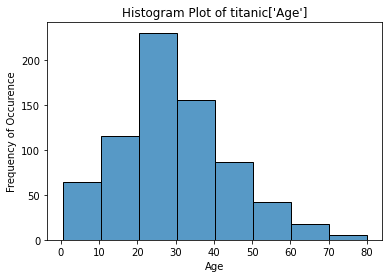

In [38]:
# CODE 11: Plot histogram of variable "Age"
# Use decennial age for the histogram bins, hence, number of bins=8
sns.histplot(titanic['Age'],bins = 8)
plt.ylabel("Frequency of Occurence")
plt.title("Histogram Plot of titanic['Age']")

In [39]:
# CODE 11.1: Create bins for age having equal width
bins = [0,10,20,30,40,50,60,70,80]
titanic['Age_bin'] = pd.cut(titanic['Age_imputed'], bins)

# CODE 11.2: 
print("Frequency per Age bin for Survived=0:")
print(titanic[titanic["Survived"]==0]["Age_bin"].value_counts())

print("Frequency per Age bin for Survived=1:")
print(titanic[titanic["Survived"]==1]["Age_bin"].value_counts())

Frequency per Age bin for Survived=0:
(20, 30]    271
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 70]     13
(70, 80]      4
Name: Age_bin, dtype: int64
Frequency per Age bin for Survived=1:
(20, 30]    136
(30, 40]     69
(10, 20]     44
(0, 10]      38
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
Name: Age_bin, dtype: int64


##### Note: All bins should have at least 5 values to be valid for Chi-Square test. Combine bins (60,70] and (70,80] to meet this requirement

In [40]:
# CODE 12.1: Create age bin, but combine all ages 60+
bins = [0,10,20,30,40,50,60,80]
titanic['Age_bin2'] = pd.cut(titanic['Age_imputed'], bins)

# CODE 12.2: 
print("Frequency per Age bin for Survived=0")
print(titanic[titanic["Survived"]==0]["Age_bin2"].value_counts())

print("Frequency per Age bin for Survived=1")
print(titanic[titanic["Survived"]==1]["Age_bin2"].value_counts())

Frequency per Age bin for Survived=0
(20, 30]    271
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 80]     17
Name: Age_bin2, dtype: int64
Frequency per Age bin for Survived=1
(20, 30]    136
(30, 40]     69
(10, 20]     44
(0, 10]      38
(40, 50]     33
(50, 60]     17
(60, 80]      5
Name: Age_bin2, dtype: int64


### E. Plots/Graphs

#### 1. Barplot

Text(0.5, 1.0, 'Fig 1.1 Barplot of Titanic Survival Rate per Passenger Class')

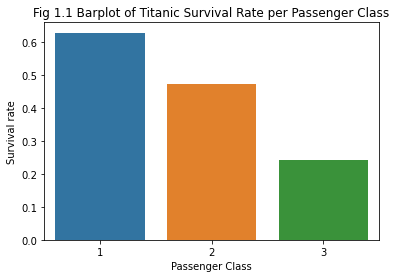

In [41]:
# CODE 13.1: Barplot of Titanic Survival Rate per Passenger Class
sns.barplot(x="Pclass", y="Survived", data=titanic, ci=None)
plt.xlabel("Passenger Class")
plt.ylabel("Survival rate")
plt.title("Fig 1.1 Barplot of Titanic Survival Rate per Passenger Class")

Text(0.5, 1.0, 'Fig 1.2 Barplot of Titanic Survival Rate per Sex')

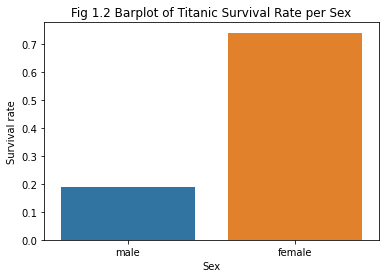

In [42]:
# CODE 13.2: Barplot of Titanic Survival Rate per Sex
sns.barplot(x="Sex", y="Survived", data=titanic, ci=None)
plt.xlabel("Sex")
plt.ylabel("Survival rate")
plt.title("Fig 1.2 Barplot of Titanic Survival Rate per Sex")

Text(0.5, 1.0, 'Fig 1.3 Barplot of Titanic Survival Rate per Age bin')

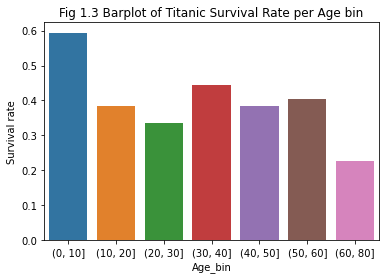

In [43]:
# CODE 13.3: Barplot of Titanic Survival Rate per Age bin
sns.barplot(x="Age_bin2", y="Survived", data=titanic, ci=None)
plt.xlabel("Age_bin")
plt.ylabel("Survival rate")
plt.title("Fig 1.3 Barplot of Titanic Survival Rate per Age bin")

#### 2. Countplot or Frequency plot

Text(0.5, 1.0, 'Fig 2.1 Countplot of Titanic Passenger Class')

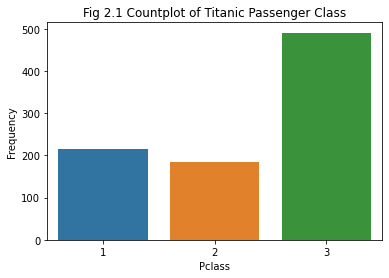

In [44]:
# CODE 14.1: Countplot of Titanic Dataset Passenger Class Variable
sns.countplot(x="Pclass",data=titanic)
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.title("Fig 2.1 Countplot of Titanic Passenger Class")

Text(0.5, 1.0, 'Fig 2.2 Countplot of Titanic Sex Variable')

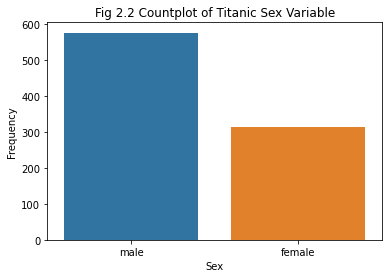

In [45]:
# CODE 14.2: Countplot of Titanic Dataset Sex Variable
sns.countplot(x="Sex",data=titanic)
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Fig 2.2 Countplot of Titanic Sex Variable")

Text(0.5, 1.0, 'Fig 2.3 Countplot of Titanic Age Group')

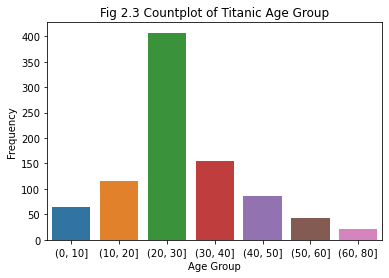

In [46]:
# CODE 14.3: Countplot of Titanic Dataset Age Variable
sns.countplot(x="Age_bin2",data=titanic)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Fig 2.3 Countplot of Titanic Age Group")

### F. Chi-Square Test

#### 1. Survival vs Passenger Class

In [47]:
# CODE 15.1: Create the Chi-square contingency table for Pclass vs Survived
contingency_table_pclass = pd.crosstab(titanic["Pclass"],titanic["Survived"])
print("Contingency table for pclass and survived")
contingency_table_pclass

Contingency table for pclass and survived


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [48]:
# CODE 15.2: Convert contingency table to list
contingency_table_pclass_list = np.array(contingency_table_pclass.iloc[0:3].values)

# CODE 15.3: Chi-Square test
stat1, p1, dof1, expected1 = chi2_contingency(contingency_table_pclass_list)

print("Null Hypothesis: There is no association between survival and passenger class.")
print("Alternative Hypothesis: There is an association between survival and passenger class.")

alpha = 0.05
if p1<alpha:
    print("\n p-value is ",p1," and is less than ",alpha,". \n Reject null hypothesis. \n There is an association between survival rate and passenger class.")
else:
    print("\n p-value is ",p1," and is at least equal to ",alpha,". \n Fail to reject null hypothesis. \n There is no association between survival rate and passenger class.")

Null Hypothesis: There is no association between survival and passenger class.
Alternative Hypothesis: There is an association between survival and passenger class.

 p-value is  4.549251711298793e-23  and is less than  0.05 . 
 Reject null hypothesis. 
 There is an association between survival rate and passenger class.


#### 2. Survival vs Passenger Sex

In [49]:
# CODE 16.1: Create the Chi-square contingency table for Sex vs Survived
contingency_table_Sex = pd.crosstab(titanic["Sex"],titanic["Survived"])
print("Contingency table for sex and survived")
contingency_table_Sex

Contingency table for sex and survived


Survived,0,1
Sex,,
female,81,233
male,468,109


In [50]:
# CODE 16.2: Convert contingency table to list
contingency_table_sex_list = np.array(contingency_table_Sex.iloc[0:2].values)

# CODE 16.3: Chi-Square test
stat2, p2, dof2, expected2 = chi2_contingency(contingency_table_sex_list)

print("Null Hypothesis: There is no association between survival and passenger sex.")
print("Alternative Hypothesis: There is an association between survival and passenger sex.")

alpha = 0.05
if p2<alpha:
    print("\n p-value is ",p2," and is less than ",alpha,". \n Reject null hypothesis. \n There is an association between survival rate and passenger sex.")
else:
    print("\n p-value is ",p2," and is at least equal to ",alpha,". \n Fail to reject null hypothesis. \n There is no association between survival rate and passenger sex.")

Null Hypothesis: There is no association between survival and passenger sex.
Alternative Hypothesis: There is an association between survival and passenger sex.

 p-value is  1.1973570627755645e-58  and is less than  0.05 . 
 Reject null hypothesis. 
 There is an association between survival rate and passenger sex.


#### 3. Survival vs Passenger Age

In [51]:
# CODE 17.1: Create the Chi-square contingency table for Age group vs Survived
contingency_table_Age = pd.crosstab(titanic["Age_bin2"],titanic["Survived"])
print("Contingency table for age group and survived")
contingency_table_Age

Contingency table for age group and survived


Survived,0,1
Age_bin2,,
"(0, 10]",26,38
"(10, 20]",71,44
"(20, 30]",271,136
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 80]",17,5


In [52]:
# CODE 17.2: Convert contingency table to list
contingency_table_age_list = np.array(contingency_table_Age.iloc[0:7].values)

# CODE 17.3: Chi-Square test
stat3, p3, dof3, expected3 = chi2_contingency(contingency_table_age_list)

print("Null Hypothesis: There is no association between survival and passenger sex.")
print("Alternative Hypothesis: There is an association between survival and passenger sex.")

alpha = 0.05
if p3<alpha:
    print("\n p-value is ",p3," and is less than ",alpha,". \n Reject null hypothesis. \n There is an association between survival rate and passenger age.")
else:
    print("\n p-value is ",p3," and is at least equal to ",alpha,". \n Fail to reject null hypothesis. \n There is no association between survival rate and passenger age.")

Null Hypothesis: There is no association between survival and passenger sex.
Alternative Hypothesis: There is an association between survival and passenger sex.

 p-value is  0.001838237788630463  and is less than  0.05 . 
 Reject null hypothesis. 
 There is an association between survival rate and passenger age.


In [53]:
# CODE 18: Print table containing results of Chi-square Test
chi_square_result = pd.DataFrame([
    [stat1, p1, dof1],
    [stat2, p2, dof2],
    [stat3, p3, dof3]], columns=["Chi-Square Statistics", "p-value", "Degrees of Freedom"], index=["Test 1 (vs Pclass)","Test 2 (vs Sex)","Test 3 (vs Age Group)"])
chi_square_result

,Chi-Square Statistics,p-value,Degrees of Freedom
Test 1 (vs Pclass),102.888989,4.549252e-23,2
Test 2 (vs Sex),260.717020,1.197357e-58,1
Test 3 (vs Age Group),20.995233,1.838238e-03,6
